In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')
from IPython.display import display


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Robotics\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Authentication
consumerKey = "jLsJDtWU8yD5tZlcmwlzYnGjj"
consumerSecret = "Y236WRUhs5ylGfcZwjmabwPRWwedThHVB8gFVBPC3oTNAbRnCz"
accessToken = "964316780993933313-ZJOdE1MRMA8WyqZoNajtj0EWy4KQVDI"
accessTokenSecret = "qMOuqbyZmKXQTVXGFofwriLZpZn5zAAwGjsw0Wlft7M0a"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [72]:
# Write a function that takes the input of a state, and returns a dictionary containing with keys as the every city of the state, and the values being the longitude and latitude coordinates of each city, along with the radius for their groups.
def get_coordinates(state):
    place = api.search_geo(query=state, granularity='city')
    state_geo =  [place[0].bounding_box.coordinates[0][0][0], place[0].bounding_box.coordinates[0][0][1]]
    state_geo = api.reverse_geocode(lat = state_geo[0], long = state_geo[1])
    # Get the coordinates of the state
    print(state_geo)
    state_coordinates = api.search_geo(lat = state_geo[0], long = state_geo[1] , granularity="city")
    city_coordinates = {}

    for place in state_coordinates:
        print(place.bounding_box.coordinates)
        city_coordinates[place.name] = [place.bounding_box.coordinates[0][0][0], place.bounding_box.coordinates[0][0][1]]
    print(city_coordinates)

    return city_coordinates
print(get_coordinates("Texas"))

TweepyException: Unable to parse response payload: {'errors': [{'code': 3, 'message': 'Invalid coordinates.'}], 'query': {'url': 'https://api.twitter.com/1.1/geo/reverse_geocode.json?lat=-106.645646&long=25.837092', 'type': 'reverse_geocode', 'params': {'accuracy': 0.0, 'coordinates': {'coordinates': [0.0, 0.0], 'type': 'Point'}, 'granularity': ''}}}

In [20]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'transgender'
noOfTweet = 400

tweets = tweepy.Cursor(api.search_tweets, q=keyword,geocode = '32.735687,,-97.108063,10mi').items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
cityDict = {}
# write a function that takes the average of a given array and returns the average
def average(arr):
    return (sum(arr) / len(arr))
usefulTweets = 0
for tweet in tweets:
    # location = tweet.user.location
    location = 'Arlington'
    username = tweet.user.id
    users = []
    switch = False
    if "TX" in location or switch == False:
        usefulTweets+=1
        # location = (location.replace(', TX', '')).lower()
        if location in cityDict.keys():
            cityDict[location][0]+=1
        else:
            cityDict[location] = [1,[]]
        tweet_list.append(tweet.text)

        print(location)
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity
        cityDict[location][1].append(polarity)
        if username in users:
            if neg > pos:
                negative_list.append(tweet.text)
                negative += 1
            elif pos > neg:
                positive_list.append(tweet.text)
                positive += 1
            
            elif pos == neg:
                neutral_list.append(tweet.text)
                neutral += 1
for city in cityDict:
    cityDict[city][1] = sum(cityDict[city][1])/len(cityDict[city][1])
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print(cityDict)
print('---')
print(usefulTweets)

Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
Arlington
{'Arlington': [15, 0.4973333333333333]}
---
15


In [21]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  15
positive number:  0
negative number:  0
neutral number:  0


In [24]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(usefulTweets)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@LoveHerMo \nPromoted racial hatred and separa...,promoted racial hatred and separation he h...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
1,Nevada Democrat seeks to become first openly t...,nevada democrat seeks to become first openly t...,0.125000,0.416667,neutral,0.0,1.0,0.0,0.0
2,Being transgender at work https://t.co/Yzp0tCs...,being transgender at work,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
3,"In 2019, Chynal Lindsey's body was found near ...",in 2019 chynal lindsey s body was found near ...,0.050000,0.200000,negative,NaN,NaN,NaN,NaN
4,"In 2019, Chynal Lindsey's body was found near ...",in 2019 chynal lindsey s body was found near ...,0.050000,0.200000,negative,NaN,NaN,NaN,NaN
5,@disclosetv An transgender “Admiral” that neve...,an transgender admiral that never captaine...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
6,@TheStevenB @TheKateMcK People assume that pro...,people assume that progressive folks are a...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
7,Will smith is a The absolute God on film but a...,will smith is a the absolute god on film but a...,0.200000,0.600000,positive,NaN,NaN,NaN,NaN
8,@hamsammish @SuperGiGi @conservmillen So CRT i...,so crt isn t real that s made up for st...,0.500000,0.500000,positive,NaN,NaN,NaN,NaN
9,The #SCOTUS Nov. 1 turned down an appeal from ...,the scotus nov 1 turned down an appeal from ...,-0.077778,0.194444,negative,NaN,NaN,NaN,NaN


In [25]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [26]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,5,33.33
neutral,5,33.33
positive,5,33.33


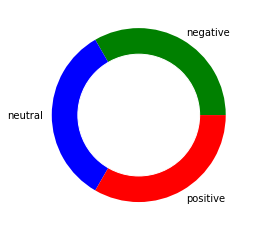

In [27]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,'sentiment')
names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [28]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


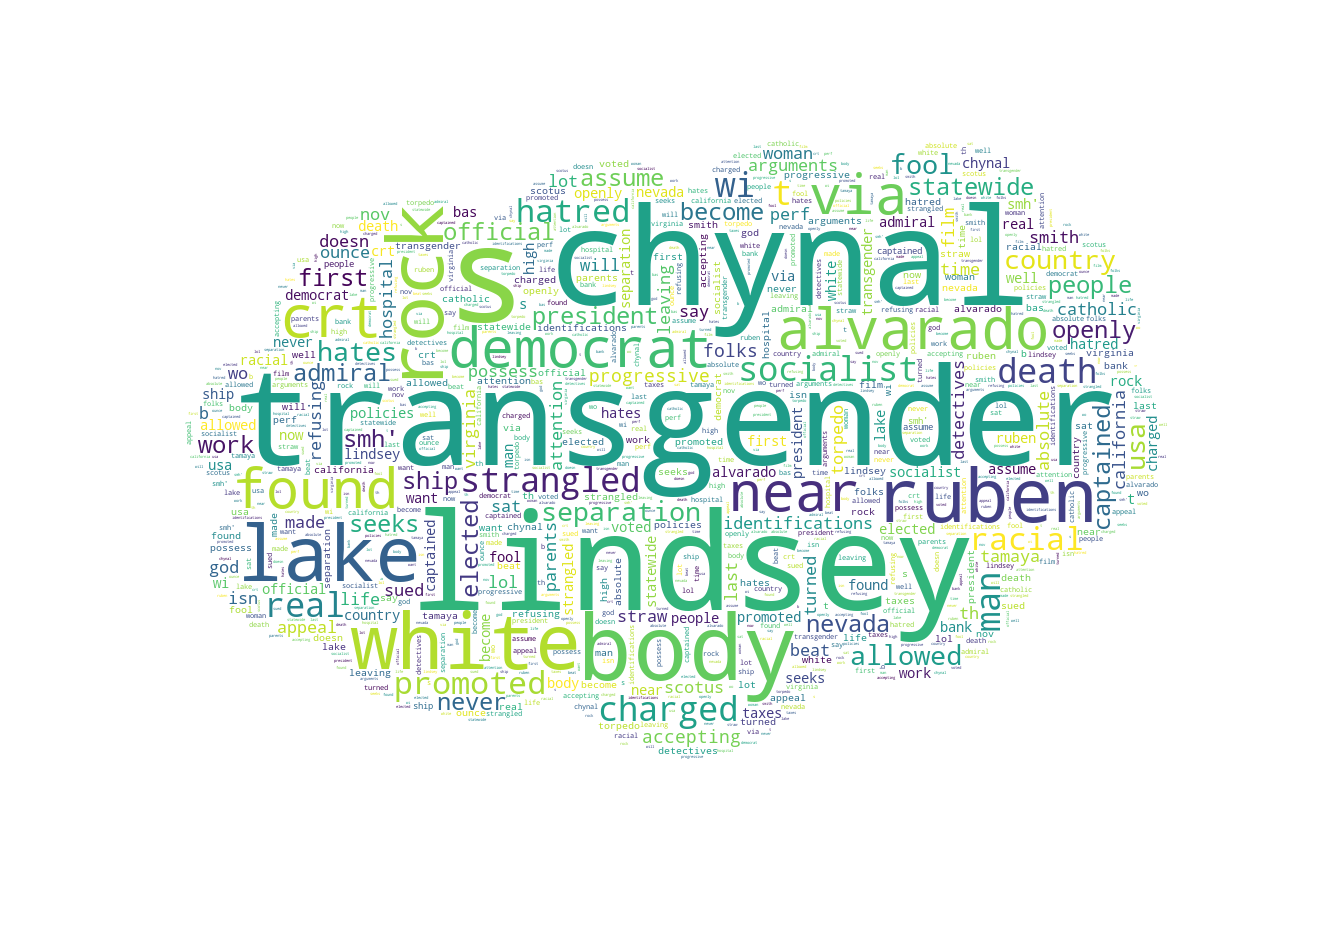

In [29]:
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


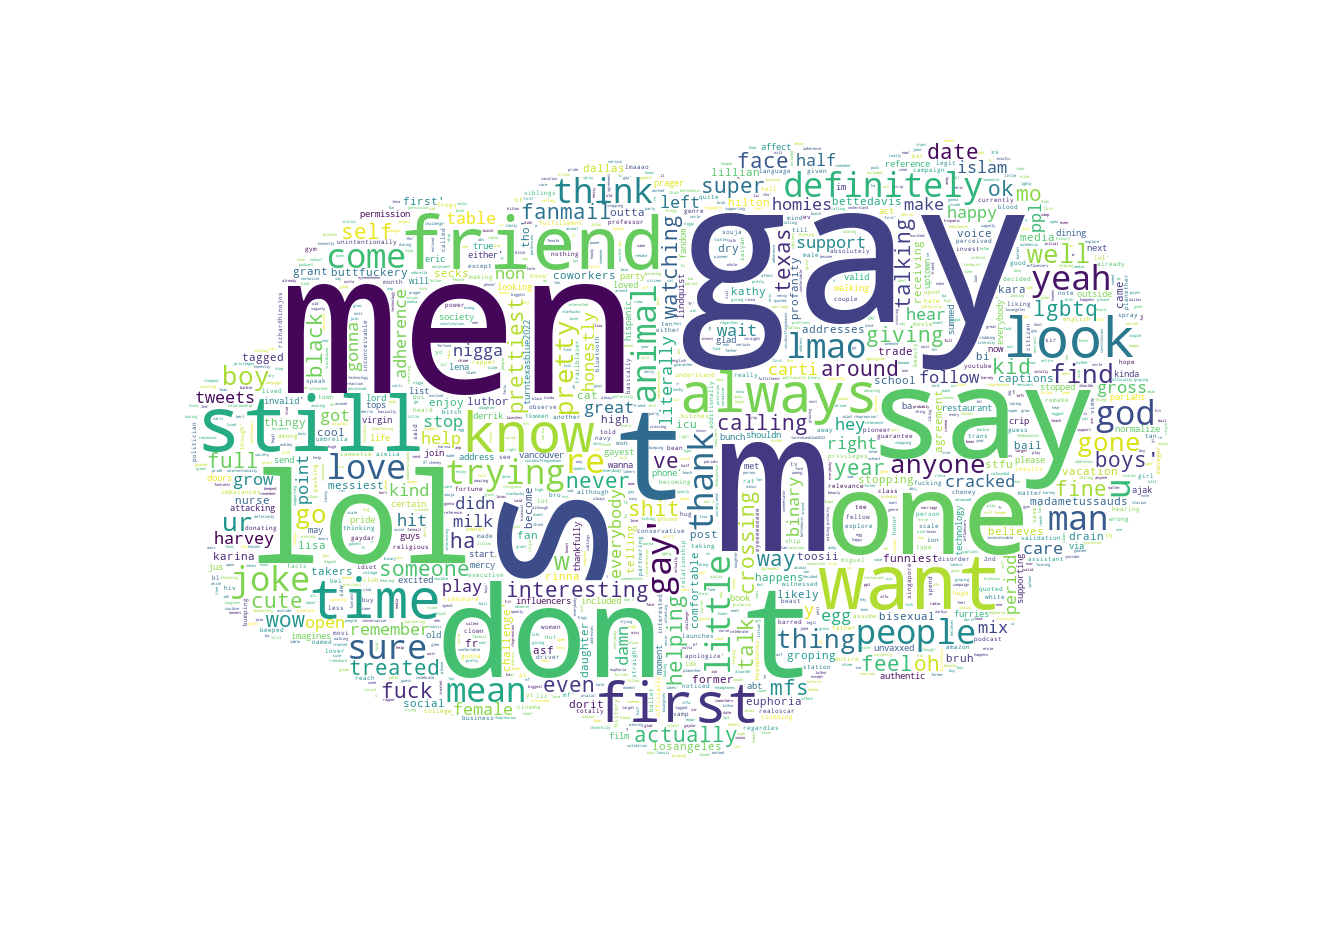

In [11]:

#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


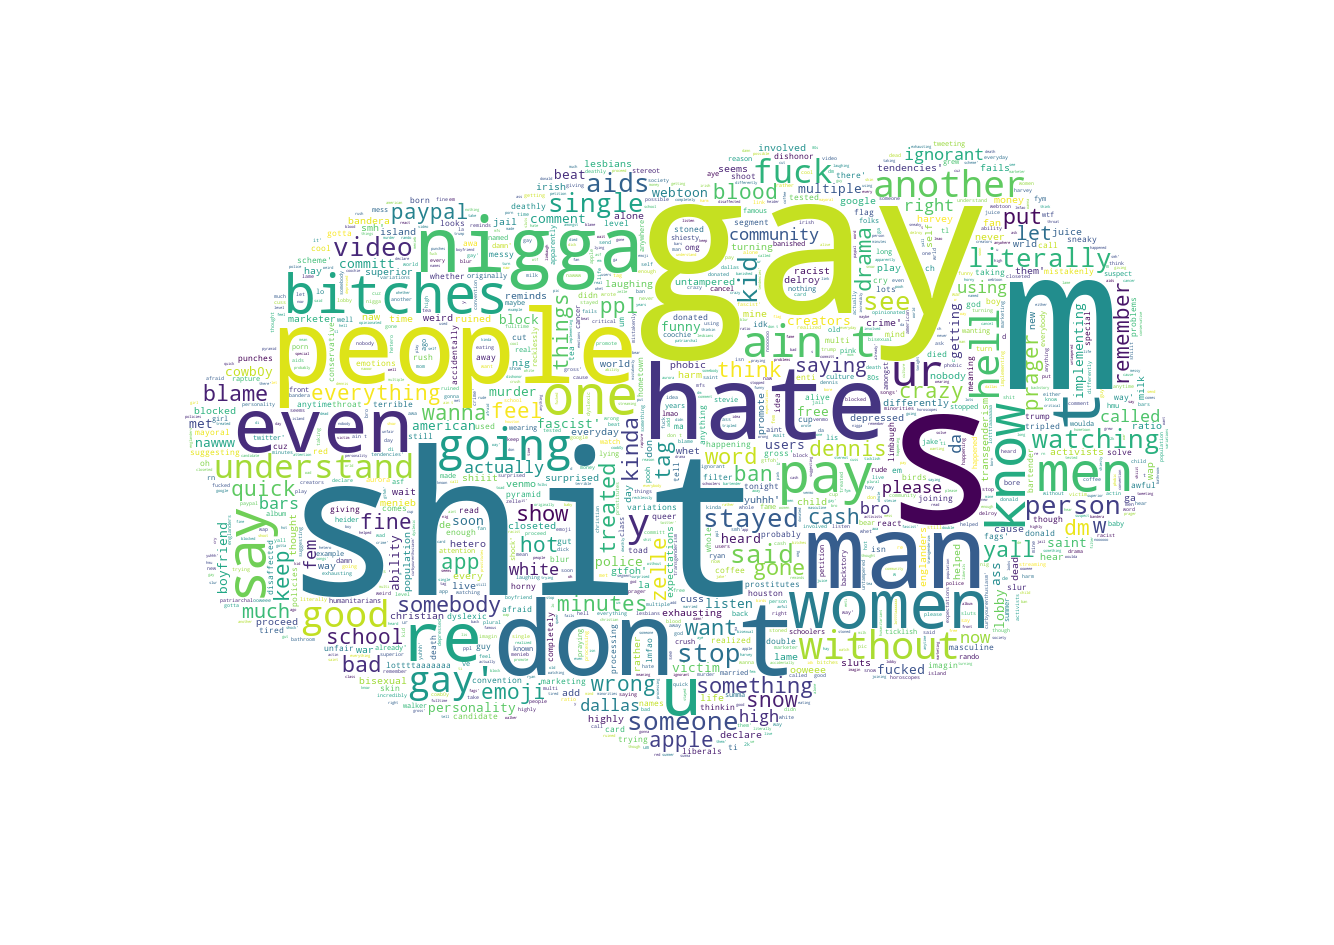

In [12]:

#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


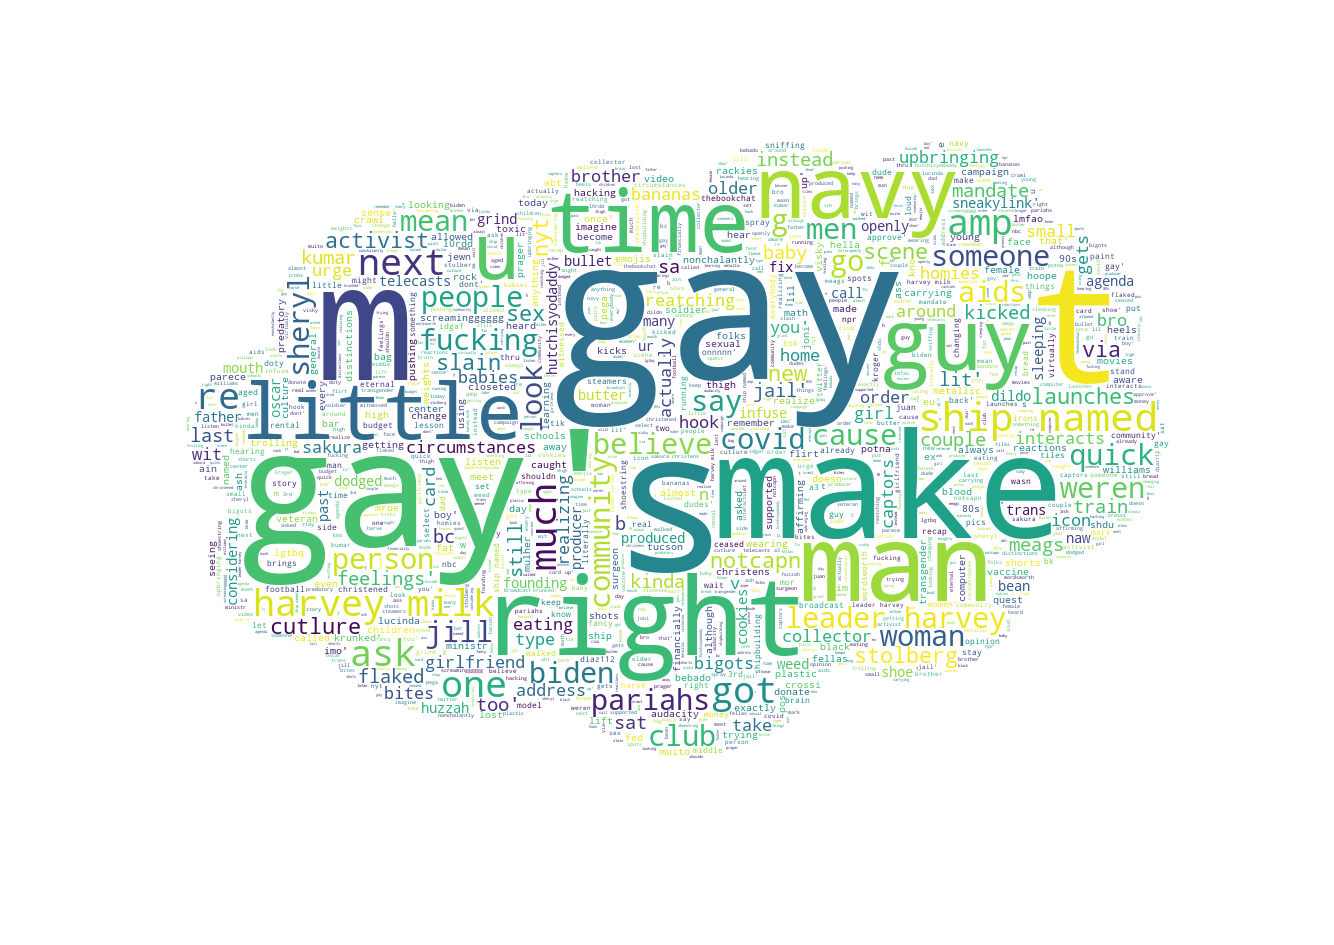

In [13]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)